# Семестровое Задание

# Food and their calories
### Variety of food and their calories based on serving

Ссылка на проект https://www.kaggle.com/datasets/vaishnavivenkatesan/food-and-their-calories

# About Dataset
### Context
The data set consist of food such as soup,ice-cream,pizza,vegetables,fruits etc, the serving for which the calories are calculated.

### Content
There are three columns for this dataset: Food Serving Calories

### Inspiration
We would always wanted to prepare the diet chart based in the calories. This the dataset then.

Load the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузка данных

In [ ]:
# Загрузка данных
df = pd.read_csv("Food and Calories - Sheet1.csv")

In [ ]:
# Посмотрим на первые несколько строк датасета
print(df.head())

        Food              Serving Calories
0  Artichoke  1 artichoke (128 g)   60 cal
1    Arugula         1 leaf (2 g)    1 cal
2  Asparagus       1 spear (12 g)    2 cal
3  Aubergine  1 aubergine (458 g)  115 cal
4   Beetroot        1 beet (82 g)   35 cal


In [ ]:
# Посмотрим общую информацию о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      562 non-null    object
 1   Serving   562 non-null    object
 2   Calories  562 non-null    object
dtypes: object(3)
memory usage: 13.3+ KB
None


In [ ]:
# Проверим наличие пропущенных значений
print(df.isnull().sum())

Food        0
Serving     0
Calories    0
dtype: int64


In [ ]:
# Опишем числовые признаки
print(df.describe())

          Food         Serving Calories
count      562             562      562
unique     541             381      307
top     Olives  1 tbsp (14 ml)  124 cal
freq         2              30       15


In [ ]:
# Построим гистограмму распределения калорийности
import matplotlib.pyplot as plt

Предобработка данных

In [ ]:
# Проверим уникальные значения в столбце "Food"
print(df['Food'].unique())

# Приведем все значения столбца "Food" к нижнему регистру
df['Food'] = df['Food'].str.lower()

# Проверим уникальные значения после преобразования
print(df['Food'].unique())

# Преобразуем категориальный признак "Food" в числовой при помощи кодировки
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Food_encoded'] = label_encoder.fit_transform(df['Food'])

# Посмотрим на уникальные значения после кодировки
print(df['Food_encoded'].unique())

# Удалим столбец "Food", так как у нас есть его числовое представление
df.drop(columns=['Food'], inplace=True)

# Проверим первые строки датасета после преобразований
print(df.head())

['Artichoke' 'Arugula' 'Asparagus' 'Aubergine' 'Beetroot' 'Bell Pepper'
 'Black Olives' 'Broccoli' 'Brussels Sprouts' 'Cabbage' 'Capsicum'
 'Carrot' 'Cauliflower' 'Celery' 'Chard' 'Cherry Tomato' 'Chicory'
 'Chinese Cabbage' 'Chives' 'Collard Greens' 'Corn' 'Courgette'
 'Creamed Spinach' 'Cucumber' 'Eggplant' 'Endive' 'Fennel' 'Garlic'
 'Gherkin' 'Gourd' 'Green Beans' 'Green Olives' 'Green Onion'
 'Horseradish' 'Kale' 'Kohlrabi' 'Kumara' 'Leek' 'Lettuce' 'Mushrooms'
 'Mustard Greens' 'Nori' 'Okra' 'Olives' 'Onion' 'Parsnips' 'Peas'
 'Pepper' 'Potato' 'Pumpkin' 'Radishes' 'Red Cabbage' 'Rutabaga'
 'Shallots' 'Spinach' 'Squash' 'Sweet Potato' 'Tomato' 'Turnip Greens'
 'Turnips' 'Wasabi' 'Winter Squash' 'Zucchini' 'Acai' 'Apple' 'Applesauce'
 'Apricot' 'Avocado' 'Banana' 'Blackberries' 'Blood Oranges' 'Blueberries'
 'Cantaloupe' 'Cherries' 'Clementine' 'Cranberries' 'Currants'
 'Custard Apple' 'Dates' 'Figs' 'Fruit salad' 'Grapes' 'Greengage' 'Guava'
 'Jackfruit' 'Jujube' 'Kiwi' 'Lemon' '

Визуализация данных

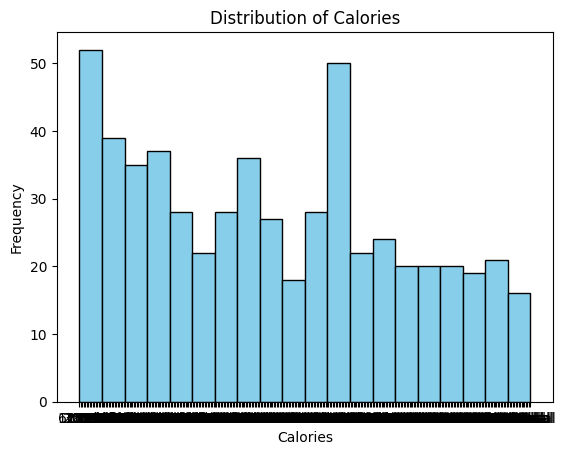

In [ ]:
plt.hist(df['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

Построение модель для прогнозирования калорийности продуктов на основе других признаков

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import re

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Загрузка данных
df = pd.read_csv("Food and Calories - Sheet1.csv")

# Посмотрим на первые несколько строк датасета
print(df.head())

# Проверим общую информацию о данных
print(df.info())

# Проверим наличие пропущенных значений
print(df.isnull().sum())

# Опишем числовые признаки
print(df.describe())

# Проверим уникальные значения в столбце "Serving"
print(df['Serving'].unique())

# Преобразуем категориальный признак "Food" в числовой при помощи кодировки
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Food_encoded'] = label_encoder.fit_transform(df['Food'].str.lower())

# Посмотрим на уникальные значения после кодировки
print(df['Food_encoded'].unique())

# Удалим столбец "Food", так как у нас есть его числовое представление
df.drop(columns=['Food'], inplace=True)

# Функция для извлечения числовых значений из строки
def extract_numeric_value(s):
    if isinstance(s, str):
        numeric_part = re.search(r'\d+\.?\d*', s)
        if numeric_part:
            return float(numeric_part.group())
    return None  # Вернем None для строк, которые не содержат числовых значений

# Преобразуем значения столбца 'Serving' в числовой формат
df['Serving'] = df['Serving'].apply(extract_numeric_value)

# Преобразуем 'Calories' в числовой формат
df['Calories'] = df['Calories'].str.extract(r'(\d+)').astype(float)

# Проверим данные после преобразований
print(df.head())

# Удалим строки с пропущенными значениями в столбцах 'Serving' и 'Calories'
df.dropna(subset=['Serving', 'Calories'], inplace=True)

# Проверим, сколько строк осталось после очистки данных
print(f"Количество строк после очистки данных: {len(df)}")

# Разделим данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Calories'])
y = df['Calories']

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создадим и обучим модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Сделаем предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оценим качество модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

        Food              Serving Calories
0  Artichoke  1 artichoke (128 g)   60 cal
1    Arugula         1 leaf (2 g)    1 cal
2  Asparagus       1 spear (12 g)    2 cal
3  Aubergine  1 aubergine (458 g)  115 cal
4   Beetroot        1 beet (82 g)   35 cal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      562 non-null    object
 1   Serving   562 non-null    object
 2   Calories  562 non-null    object
dtypes: object(3)
memory usage: 13.3+ KB
None
Food        0
Serving     0
Calories    0
dtype: int64
          Food         Serving Calories
count      562             562      562
unique     541             381      307
top     Olives  1 tbsp (14 ml)  124 cal
freq         2              30       15
['1 artichoke (128 g)' '1 leaf (2 g)' '1 spear (12 g)'
 '1 aubergine (458 g)' '1 beet (82 g)' '1 pepper (73 g)' '1 olive (2.7 g)'
 '1 bunch (608 g)